Aquesta és la tasca del Lliurament 2 del mòdul Sistemes d'Aprenentatge Automàtic.

Té cinc preguntes amb quatre apartats cadascuna, totes amb la mateixa puntuació.

#Descens de gradient

Explorau l'efecte de la taxa d'aprenentatge sobre l'algorisme de descens del gradient al simulador que trobareu a https://uclaacm.github.io/gradient-descent-visualiser/#playground

Triau com a funció $10sin(x)$ (haureu d'escriure el coeficient) i com a punt d'inici $x=2$.

Primer, explorau com l'algorisme convergeix a diferents mínims segons quin és el punt inicial que triam.

A continuació, indicau si l'algorisme presenta un comportament **convergent**, **divergent** o **oscil·latori** per als següents valors de la taxa d'aprenentatge.

a) $\alpha = .125$

b) $\alpha = .25$

c) $\alpha = .5$

d) Com es comporta l'algorisme si en lloc de triar una taxa d'aprenentatge positiva la triam negativa?

**a)** El apartado 'a' con una tasa de aprendizaje de .125 presenta un comportamiento convergente, debido a que no hay oscilaciones y iteración a iteración se acerca gradualmente al mínimo

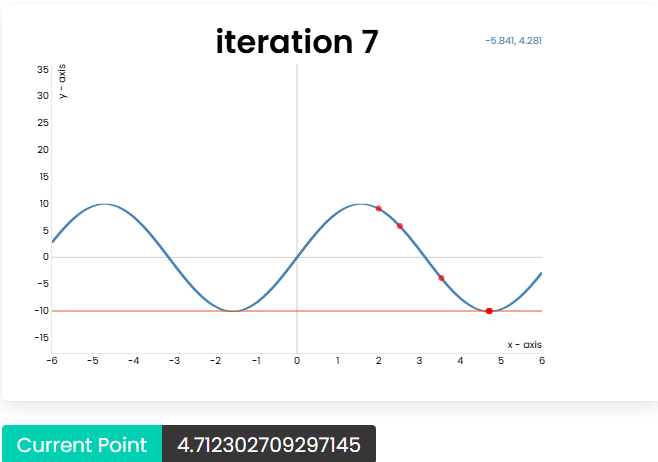

**b)** El apartado 'b' con una tasa de aprendizaje de .25 tiene un comportamiento oscilante ya que podemos ver como cuando hay una nueva iteración esta en vez de estabilizarse, cambia de valores y no llega a converger totalmente

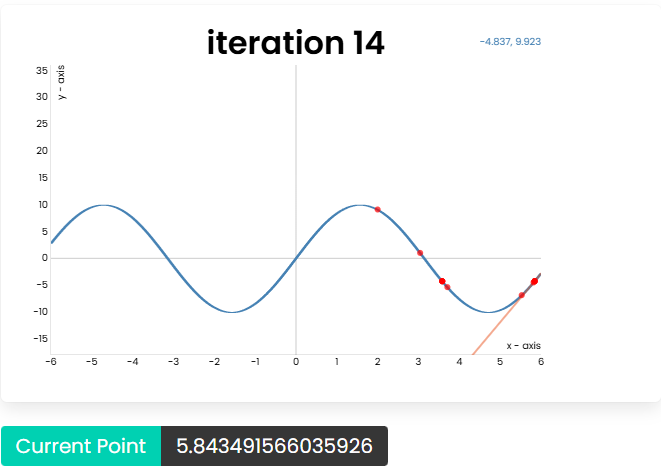

**c)** En el apartado 'c' con una tasa de aprendizaje de .5 podemos observar que tiene un comportamiento oscilante y divergente, porque al pasar cada iteracion va cambiando de sentido respecto al mínimo y tambien podemos observar que en algunas iteraciones en vez de buscar el mínimo, marca un valor muy alejado de este.

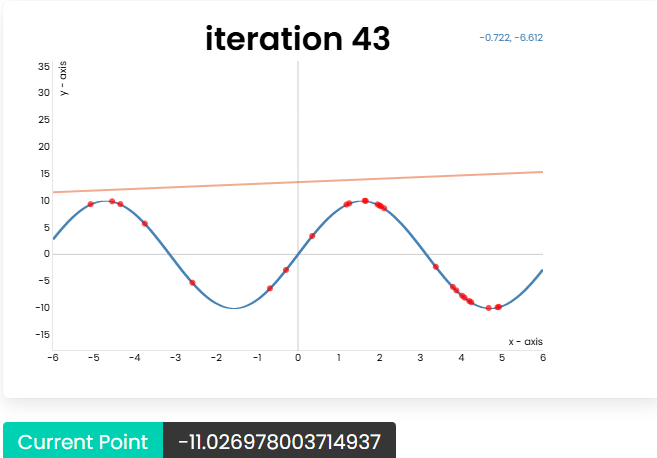

**d)** Después de probar los mismos valores de los apartados anteriores pero con un sentido negativo, puedo determinar que los valores negativos comparten un comportamiento oscilante ya que van rebotando entre el mínimo

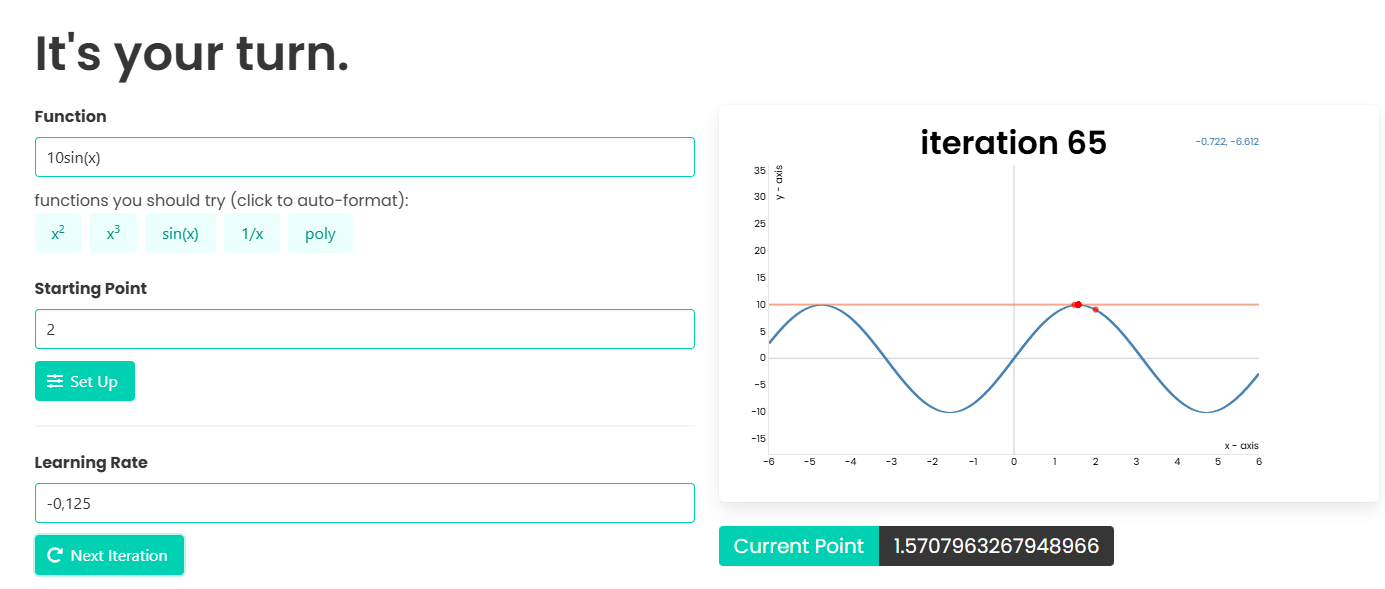

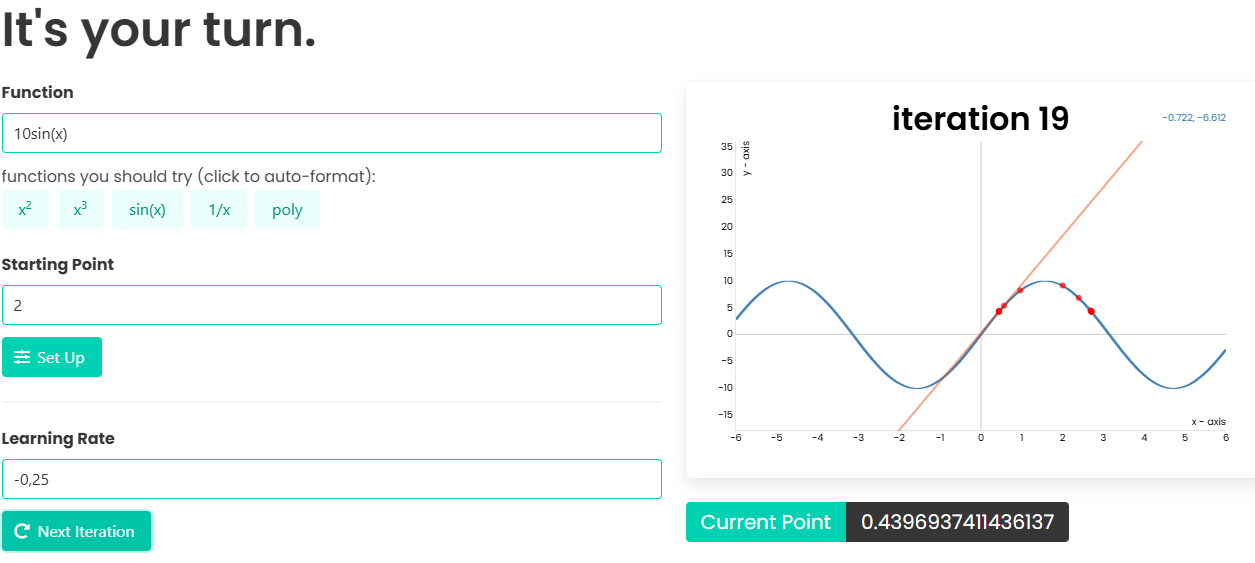

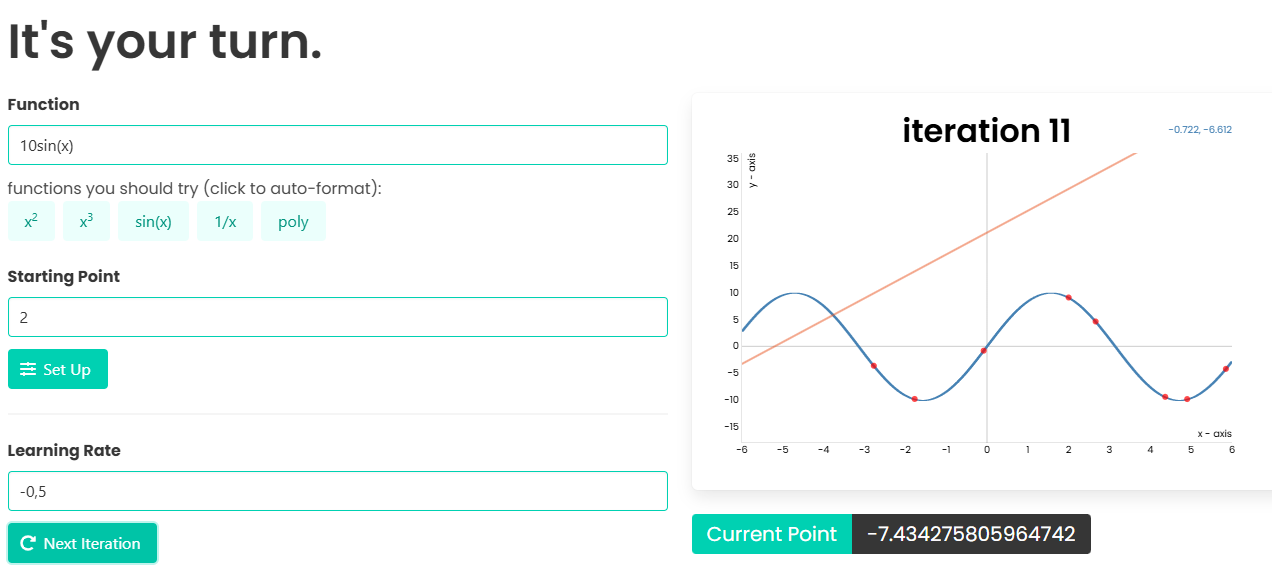

#Regressió logística

Al codi següent, extret de https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py afegiu-hi les línies que necessiteu i responeu les qüestions següents, referides a la regressió logística.

a) Quin és el valor del pes **w**?

b) Quin és el valor del biaix **b**?

c) Quin punt de tall en x marca la frontera entre la classe positiva i la negativa?

d) Quin paràmetre de regularització s'utilitza?

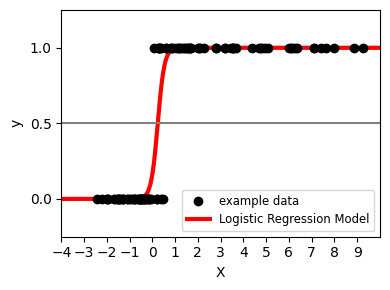

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LogisticRegression

# Generate the dataset
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()


In [ ]:
# a)
print(f'Valor del peso w: {clf.coef_[0][0]}')

Valor del peso w: 6.866805804226174


In [ ]:
# b)
print(f'Valor del sesgo b: {clf.intercept_[0]}')

Valor del sesgo b: -1.638899398538546


In [ ]:
# c)
print(f'Valor del punto de corte en x: {-clf.intercept_[0]/clf.coef_[0][0]}')

Valor del punto de corte en x: 0.23866983358257865


In [ ]:
# d)
print(f'Parámetro de regularización: {clf.C}')

Parámetro de regularización: 100000.0


#Màquines de suport vectorial

Aplicau els quatre classificadors basats en SVM de la pàgina https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html al problema de la XOR. El codi que necessitam ja està copiat aquí al quadern, no l'heu de dur de la web.

a) Generau $400$ punts amb coordenades $x[:,0]$ i $x[:,1]$ aleatòries uniformement repartides entre $-1$ i $1$.
https://numpy.org/doc/1.15/reference/generated/numpy.random.rand.html

In [ ]:
n_puntos = 400
X = 2 * np.random.rand(n_puntos, 2) - 1

b) Per a cada punt, assignau l'etiqueta de classe $y$ igual a $1$ si les dues coordenades són del mateix signe i $0$ si són de signe oposat.

In [ ]:
y = np.logical_xor(np.sign(x[:, 0]) == np.sign(x[:, 1]), 1)
y = y.astype(int)

c) Visualitzau les dades que heu generat. Heu d'obtenir un gràfic semblant al de l'apartat dels apunts de SVM amb kernel.

Per aconseguir-ho, executau la cel·la següent, que modelitzarà les dades que heu generat.

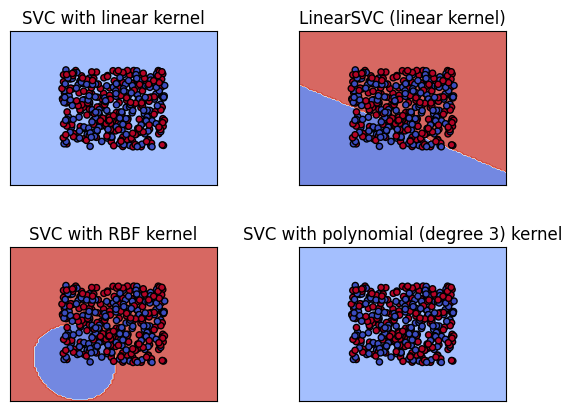

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Observau que el model que millor s'ajusta a les dades és el que utilitza kernel RBF.

d) Finalment, explorem la influència del paràmetre $\gamma$ en la simetria del model. Per això, en lloc de mostrar quatre models diferents, ara mostrareu nou variants d'un mateix model, el de kernel RBF amb nou valors diferents de $\gamma$, de $0.1$ a $0.9$. Copiau el codi de la cel·la anterior en la següent i modificau-lo de forma que es puguin veure simultàniament els nou gràfics. Haureu de canviar els paràmetres de `subplot`, els `title`...

Quin valor de $\gamma$ és el que dona un resultat més simètric?

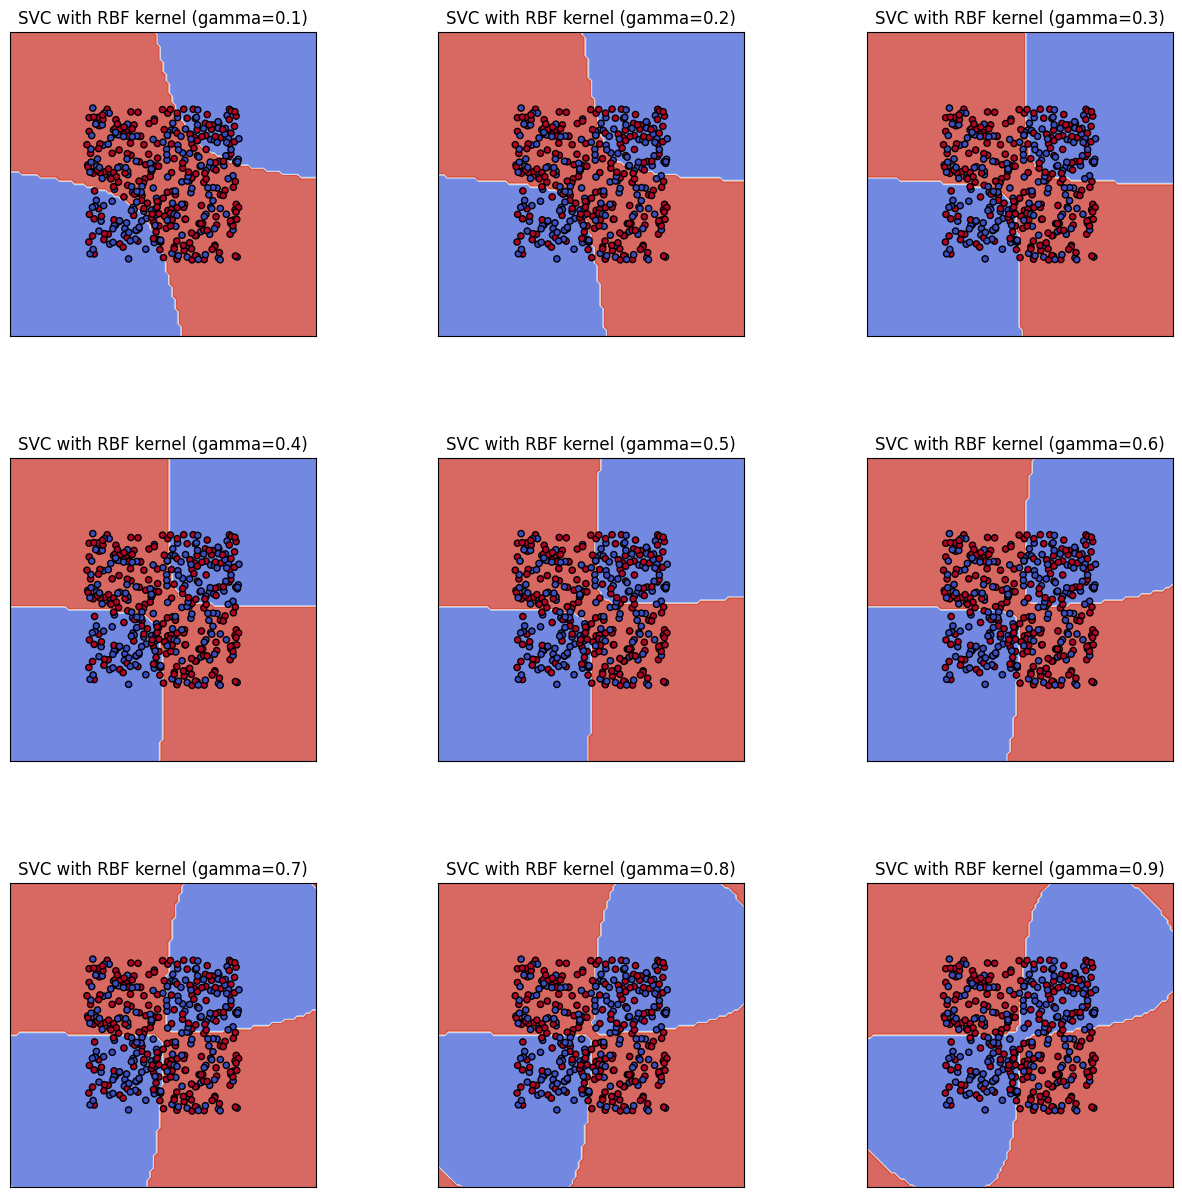

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


C = 1.0

gammas = np.linspace(0.1, 0.9, 9)
models = [svm.SVC(kernel="rbf", gamma=g, C=C) for g in gammas]

titles = [f"SVC with RBF kernel (gamma={g:.1f})" for g in gammas]

fig, sub = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    clf.fit(x, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


#Arbres de decisió

Modificau l'exemple d'arbre de decisió que trobareu a https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html de forma que utilitzi les mateixes característiques que als apunts: la longitud i l'amplada del pètal. Hi ha un requadre al [quadern de classificació](https://colab.research.google.com/drive/1IC31YREPePBlheVHL3zLL1vW4Sb5NFQk?usp=sharing) sota el títol **Preparació de les dades** on se seleccionen aquestes característiques.

Distribuïu el codi en els cinc apartats següents.

###Importacions i càrrega de les dades

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

###Generació de la graella de punts

In [ ]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

###Ajust del model i predicció

In [ ]:
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)

### Visualització de les zones de decisió i de les dades d'entrenament

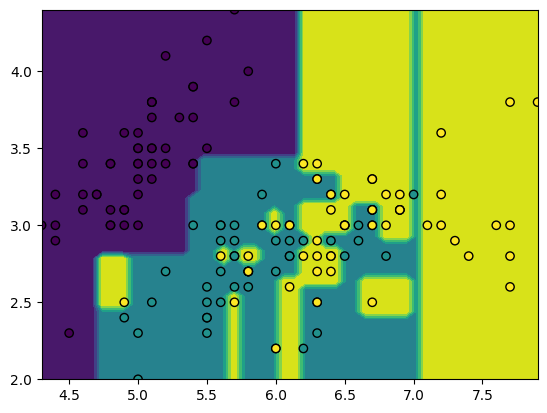

In [ ]:
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)
plt.show()

Quan executeu el codi podreu observar la forma característica de les fronteres en els arbres de decisió, formada per segments paral·lels als eixos.

#Classificació k-nearest neighbours


En aquesta darrera pregunta explorarem l'efecte del nombre de veïns $k$ en l'algorisme KNN i ho relacionarem amb l'infraajust o sobreajust del model.

El codi està tot desenvolupat, la vostra feina aquí és interpretar els resultats i modificar qualque paràmetre numèric.

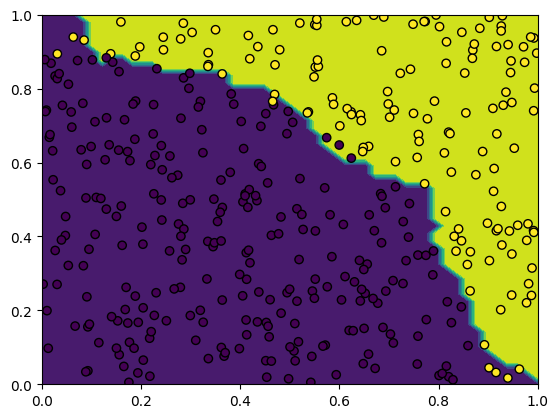

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()



a) Per què convé que el nombre de veïns sigui senar?

b) Explicau per què no tots els punts de dades estan classificats correctament.

c) Quin valor de $k$ garantiria que tots els punts de dades estarien classificats correctament? Podeu comprovar-ho experimentant al codi.

d) Quin problema presentaria en aquest cas el model, infraajust o sobreajust?

**a)** Conviene que el número de vecinos sea impar para así evitar posibles empates en las predicciones, ya que si tenemos un niumero impar hará que siempre haya un vecino que desempate la predicción y así facilitar la clasificacion


**c)** En este caso he probado con un valor de k=1, y me los clasifica correctamente, ya que cada punto se clasifica teniendo en cuenta su vecino más próximo y así me aseguro de que no haya problemas en las fronteras de las clases

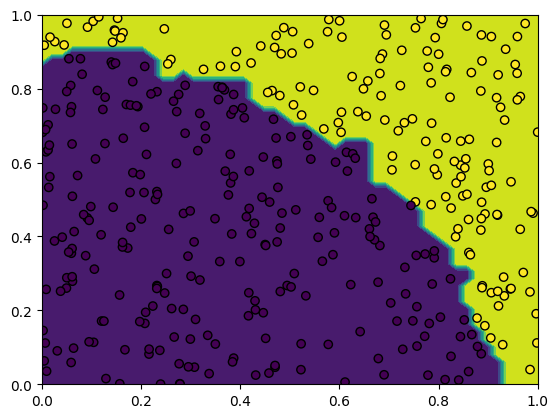

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()

**d)** Yo diría que este modelo presenta un problema de sobreajuste, ya que puede tener problemas para generalizar puntos de datos que sean nuevos los cuales no sigan las mismas tendencias del modelo